<a href="https://colab.research.google.com/github/Hariprasad893/EDA-on-Zomato-Bangalore-Restaurants-data-set/blob/main/Exploratory_Data_Analysis_on_Zomato_Bangalore_restaurants_data_set_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA on Zomato Bangalore Restaurants dataset
- Analysing the data might help new restaurants in gaining much needed competitive insigts that might help them survive longer than other restaurants

- The data consists of 51717 records, each of which consist of 16 features ranging from, address, rating, price per two, area in which a restaurant is listed and so on



## Downloading the data set from Kaggle

In [83]:
pip install opendatasets --upgrade --quiet

In [84]:
import opendatasets as od
download_url = 'https://www.kaggle.com/himanshupoddar/zomato-bangalore-restaurants'
od.download(download_url)

Skipping, found downloaded files in "./zomato-bangalore-restaurants" (use force=True to force download)


In [85]:
data_filename = './zomato-bangalore-restaurants/zomato.csv'

## Importing the necessary libraries
- pandas
- numpy
- seaborn
- matplotlib

In [86]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## Data Preparation and cleaning
- Look at the number of rows and columns in the data i.e, the shape of the data.
- Then find the different types of data types present, along with different statistics.
- If there are any missing values, handle them.


In [87]:
df = pd.read_csv(data_filename)

In [88]:
df.shape

(51717, 17)

In [89]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [90]:
df.tail()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield
51716,https://www.zomato.com/bangalore/the-nest-the-...,"ITPL Main Road, KIADB Export Promotion Industr...",The Nest - The Den Bengaluru,No,No,3.4 /5,13,+91 8071117272,"ITPL Main Road, Whitefield","Bar, Casual Dining",NaN,"Finger Food, North Indian, Continental","1,500","[('Rated 5.0', 'RATED\n Great ambience , look...",[],Pubs and bars,Whitefield


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [92]:
# finding the statistics of the number of votes
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


### Handling Missing values and unimportant features


In [93]:
df.isna().sum()/len(df)

url                            0.000000
address                        0.000000
name                           0.000000
online_order                   0.000000
book_table                     0.000000
rate                           0.150337
votes                          0.000000
phone                          0.023358
location                       0.000406
rest_type                      0.004389
dish_liked                     0.542916
cuisines                       0.000870
approx_cost(for two people)    0.006690
reviews_list                   0.000000
menu_item                      0.000000
listed_in(type)                0.000000
listed_in(city)                0.000000
dtype: float64

**It looks like more than 50% of the feature named dish_liked is missing, so we can drop it off!**

In [94]:
df.drop('dish_liked',axis=1,inplace=True)

In [95]:
df

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


**Phone number and url don't play any major role, so dropping those off too!**

In [96]:
df.drop(['url','phone'],axis=1,inplace=True)
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


**Dropping the address feature also, as the location and listed_in feautres talk about where a particular restaurant is located in**

In [97]:
df.drop('address',axis=1,inplace=True)

In [98]:
df

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Whitefield,Bar,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,Bar,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Whitefield,Bar,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [99]:
df.isna().sum()/len(df)

name                           0.000000
online_order                   0.000000
book_table                     0.000000
rate                           0.150337
votes                          0.000000
location                       0.000406
rest_type                      0.004389
cuisines                       0.000870
approx_cost(for two people)    0.006690
reviews_list                   0.000000
menu_item                      0.000000
listed_in(type)                0.000000
listed_in(city)                0.000000
dtype: float64

**Dropping the missing values of the following features:**
- approx_cost(for two people)
- rest_type
- cuisines

In [100]:
df.dropna(subset = ['approx_cost(for two people)','rest_type','cuisines'],inplace=True)
df.isna().sum()/len(df)

name                           0.000000
online_order                   0.000000
book_table                     0.000000
rate                           0.148882
votes                          0.000000
location                       0.000000
rest_type                      0.000000
cuisines                       0.000000
approx_cost(for two people)    0.000000
reviews_list                   0.000000
menu_item                      0.000000
listed_in(type)                0.000000
listed_in(city)                0.000000
dtype: float64

In [101]:
df.shape

(51148, 13)

**Now moving onto the rate feature**
- Renaming the feature as rating out of 5
- Dropping the NaN values

In [102]:
df.rename(columns={'rate':'rating out of 5'},inplace=True)
df.head()

,name,online_order,book_table,rating out of 5,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51148 entries, 0 to 51716
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51148 non-null  object
 1   online_order                 51148 non-null  object
 2   book_table                   51148 non-null  object
 3   rating out of 5              43533 non-null  object
 4   votes                        51148 non-null  int64 
 5   location                     51148 non-null  object
 6   rest_type                    51148 non-null  object
 7   cuisines                     51148 non-null  object
 8   approx_cost(for two people)  51148 non-null  object
 9   reviews_list                 51148 non-null  object
 10  menu_item                    51148 non-null  object
 11  listed_in(type)              51148 non-null  object
 12  listed_in(city)              51148 non-null  object
dtypes: int64(1), object(12)
memory 

In [104]:
df['rating out of 5']

0         4.1/5
1         4.1/5
2         3.8/5
3         3.7/5
4         3.8/5
          ...  
51712    3.6 /5
51713       NaN
51714       NaN
51715    4.3 /5
51716    3.4 /5
Name: rating out of 5, Length: 51148, dtype: object

In [105]:
df['rating out of 5'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [106]:
df.dropna(subset=['rating out of 5'],inplace=True)
df.isna().sum()/len(df)

name                           0.0
online_order                   0.0
book_table                     0.0
rating out of 5                0.0
votes                          0.0
location                       0.0
rest_type                      0.0
cuisines                       0.0
approx_cost(for two people)    0.0
reviews_list                   0.0
menu_item                      0.0
listed_in(type)                0.0
listed_in(city)                0.0
dtype: float64

In [107]:
df['rating out of 5'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

## Top 10 food chains in Bengaluru

In [108]:
df['name'].value_counts()

Cafe Coffee Day              89
Onesta                       85
Empire Restaurant            71
Kanti Sweets                 68
Just Bake                    68
                             ..
Shahi Rasoi                   1
Tarlette                      1
Aastha Bengali Mess           1
Kolkata Rolls & Fast food     1
Gopi Ice Creams               1
Name: name, Length: 7112, dtype: int64

In [109]:
df['name'].value_counts().index

Index(['Cafe Coffee Day', 'Onesta', 'Empire Restaurant', 'Kanti Sweets',
       'Just Bake', 'Five Star Chicken', 'Petoo', 'Baskin Robbins',
       'Pizza Hut', 'Polar Bear',
       ...
       'Hunger Genie', 'Mothi Restaurant', 'Ambur Biriyani Zone',
       'Vishal Sweets & Restaurant', 'KurryWheels', 'Shahi Rasoi', 'Tarlette',
       'Aastha Bengali Mess', 'Kolkata Rolls & Fast food', 'Gopi Ice Creams'],
      dtype='object', length=7112)

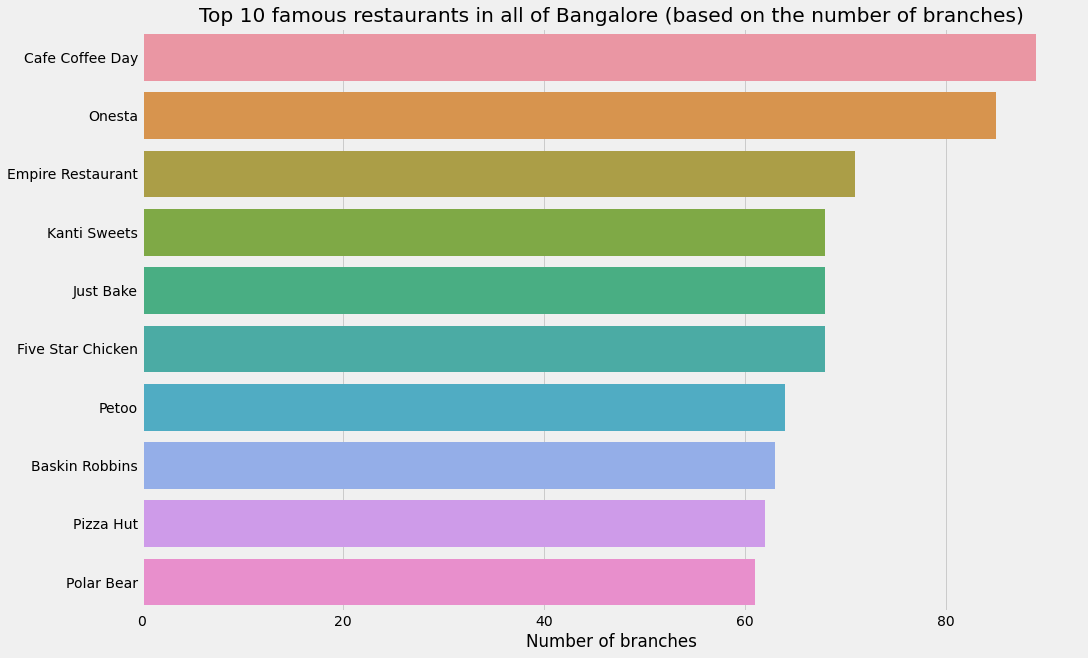

In [110]:
plt.figure(figsize = (15,10))
sb.barplot(x=df['name'].value_counts()[:10],y=df['name'].value_counts()[:10].index)
plt.xlabel('Number of branches')
plt.title('Top 10 famous restaurants in all of Bangalore (based on the number of branches)')
plt.show()

Inferences from the above graph:
- **Cafe Coffee Day** which is ranked 1, seems to have more than 80 branches all across Bangalore
- This is followed by **Onesta** 
- It is interesting to note that the famous chains like **KFC**, **Mcdonald's**, **Burger King** have not made it to the top 10 list.

### Analysing the top 3 restuarants and the distribution of their outlets across Bangalore


**Cafe Cofee Day**

In [111]:
df_cafe = df.loc[(df['name']=='Cafe Coffee Day')]

In [112]:
cafe_cofday_areas = df_cafe['location']

In [113]:
cafe_val = cafe_cofday_areas.value_counts()

In [114]:
cafe_index = cafe_val.index

In [115]:
cafe_index

Index(['Sarjapur Road', 'Jayanagar', 'Bannerghatta Road', 'Marathahalli',
       'Indiranagar', 'New BEL Road', 'Brigade Road', 'Kalyan Nagar', 'BTM',
       'Whitefield', 'Kammanahalli', 'HSR', 'Banashankari', 'Frazer Town',
       'Malleshwaram', 'Basavanagudi', 'JP Nagar', 'Koramangala 5th Block',
       'Electronic City', 'Race Course Road', 'Koramangala 7th Block',
       'Residency Road', 'Brookefield', 'Bellandur', 'Old Airport Road',
       'Lavelle Road', 'Nagawara', 'Wilson Garden', 'Rajajinagar',
       'Basaveshwara Nagar', 'Seshadripuram', 'MG Road', 'Vijay Nagar',
       'Koramangala 6th Block'],
      dtype='object')

In [116]:
cafe_counts = cafe_val.values

In [117]:
cafe_counts

array([8, 6, 6, 5, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [118]:
import warnings
warnings.filterwarnings('ignore')

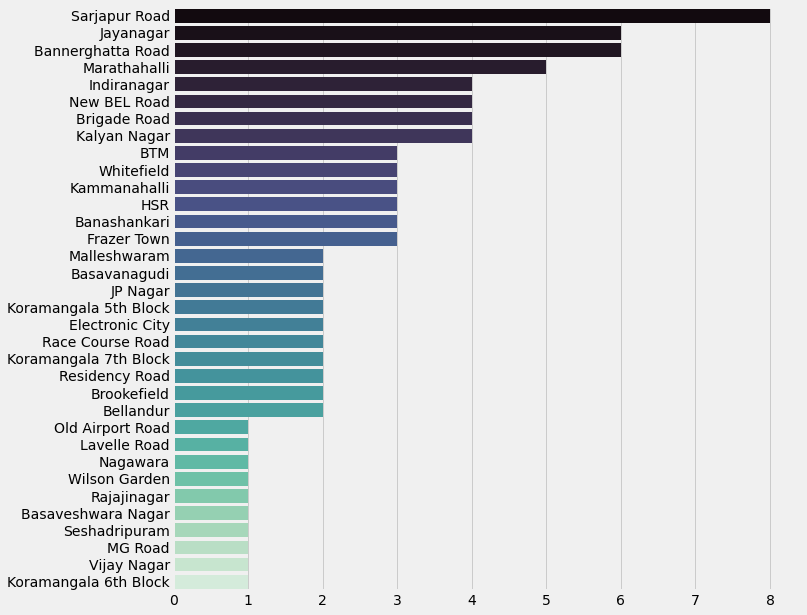

In [119]:
plt.figure(figsize=(10,10))
sb.barplot(cafe_counts,cafe_index,palette="mako")
plt.show()

- It seems that in about Sarjapur Road,Jayanagar, Marathahalli,New BEL Road, Kalyan Nagar, Brigade Road and Indiranagar there are 4 or more Cafe Coffee Day outlets present. 

- Apart from this it is interesting to note that Cafe Coffee Day has established a whopping 34 outlets in total across the city!

**Assigning a list which contains those areas which have 4 or more restaurants**

In [120]:
cafe_top_areas = list(cafe_index[cafe_counts>=4])

In [121]:
cafe_top_areas

['Sarjapur Road',
 'Jayanagar',
 'Bannerghatta Road',
 'Marathahalli',
 'Indiranagar',
 'New BEL Road',
 'Brigade Road',
 'Kalyan Nagar']

**Onesta**

In [122]:
df_onesta = df.loc[(df['name'] == 'Onesta')]

In [123]:
onesta_areas = df_onesta['location']

In [124]:
onesta_vals = onesta_areas.value_counts()

In [125]:
onesta_counts = onesta_vals.values

In [126]:
onesta_counts

array([19, 10,  9,  8,  6,  6,  5,  5,  4,  4,  4,  3,  2])

In [127]:
onesta_indices = onesta_vals.index

In [128]:
onesta_indices

Index(['Koramangala 4th Block', 'JP Nagar', 'Basaveshwara Nagar', 'HSR',
       'Kammanahalli', 'Brookefield', 'Electronic City', 'Banashankari',
       'New BEL Road', 'Indiranagar', 'Marathahalli', 'Whitefield',
       'Basavanagudi'],
      dtype='object')

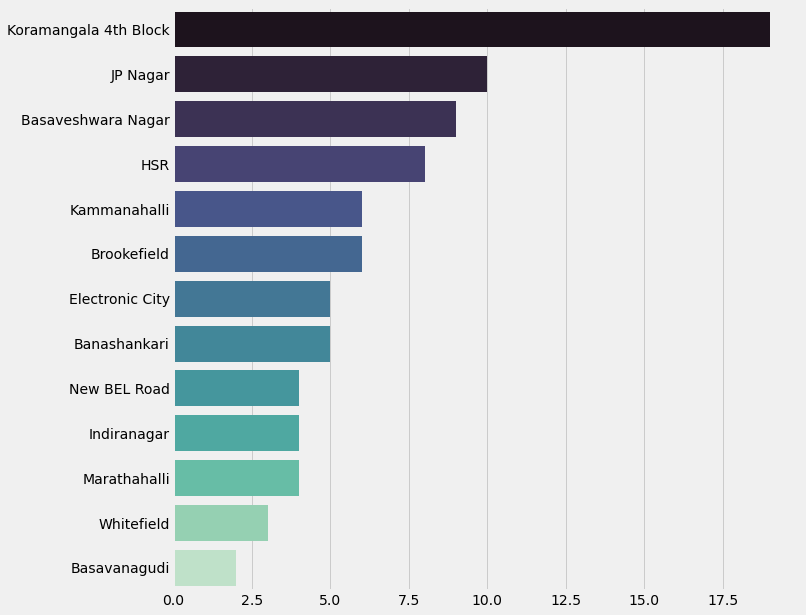

In [129]:
plt.figure(figsize = (10,10))
sb.barplot(onesta_counts,onesta_indices,palette='mako')
plt.show()

- It seems that in almost all the areas they have established except Whitefield and Basavanagudi, there are 4 or more Onesta outlets present. 
- The total number of Onesta outlets stands at 13 

**Assigning a list which contains those areas which have 4 or more restaurants**

In [130]:
onesta_top_areas = list(onesta_indices[onesta_counts>=4])

In [131]:
onesta_top_areas

['Koramangala 4th Block',
 'JP Nagar',
 'Basaveshwara Nagar',
 'HSR',
 'Kammanahalli',
 'Brookefield',
 'Electronic City',
 'Banashankari',
 'New BEL Road',
 'Indiranagar',
 'Marathahalli']

**Empire Restuarant**

In [132]:
df_empire = df.loc[(df['name'] == 'Empire Restaurant')]

In [133]:
empire_areas = df_empire['location']

In [134]:
empire_vals = empire_areas.value_counts()

In [135]:
empire_indices = empire_vals.index

In [136]:
empire_indices

Index(['Koramangala 5th Block', 'Church Street', 'Jayanagar', 'Indiranagar',
       'Kammanahalli', 'Bellandur', 'HSR', 'Frazer Town', 'Rajajinagar',
       'Brigade Road', 'BTM', 'Varthur Main Road, Whitefield', 'JP Nagar',
       'Electronic City', 'Koramangala 7th Block', 'RT Nagar',
       'Bannerghatta Road', 'Malleshwaram'],
      dtype='object')

In [137]:
empire_counts = empire_vals.values

In [138]:
empire_counts

array([10,  9,  6,  5,  5,  4,  4,  4,  4,  4,  4,  3,  3,  2,  1,  1,  1,
        1])

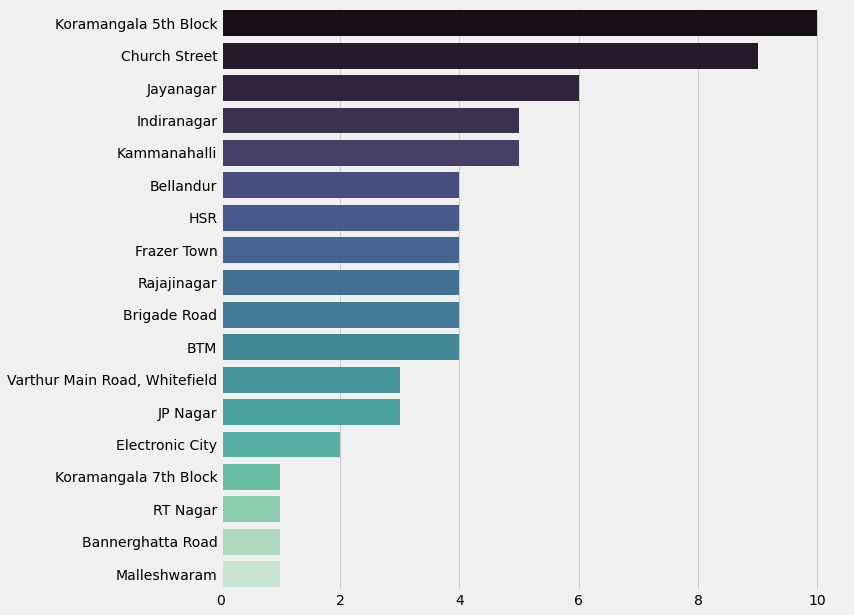

In [139]:
plt.figure(figsize = (10,10))
sb.barplot(empire_counts,empire_indices,palette='mako')
plt.show()

- Except in 7 areas, there are less than 4 outlets
- The total number of outlets of the **Empire Restaurant** is 18

**Assigning a list which contains those areas which have 4 or more restaurants**

In [140]:
empire_top_areas = list(empire_indices[empire_counts>=4])

In [141]:
empire_top_areas

['Koramangala 5th Block',
 'Church Street',
 'Jayanagar',
 'Indiranagar',
 'Kammanahalli',
 'Bellandur',
 'HSR',
 'Frazer Town',
 'Rajajinagar',
 'Brigade Road',
 'BTM']

**Finding the common areas where all the top three restuarants are established in**

In [142]:
top_areas = cafe_top_areas + onesta_top_areas + empire_top_areas
top_areas_set = set(top_areas)

In [143]:
top_areas

['Sarjapur Road',
 'Jayanagar',
 'Bannerghatta Road',
 'Marathahalli',
 'Indiranagar',
 'New BEL Road',
 'Brigade Road',
 'Kalyan Nagar',
 'Koramangala 4th Block',
 'JP Nagar',
 'Basaveshwara Nagar',
 'HSR',
 'Kammanahalli',
 'Brookefield',
 'Electronic City',
 'Banashankari',
 'New BEL Road',
 'Indiranagar',
 'Marathahalli',
 'Koramangala 5th Block',
 'Church Street',
 'Jayanagar',
 'Indiranagar',
 'Kammanahalli',
 'Bellandur',
 'HSR',
 'Frazer Town',
 'Rajajinagar',
 'Brigade Road',
 'BTM']

## Top 10 Food Loving areas of Bangalore
- Finding the distribution of number of restaurants present in different areas

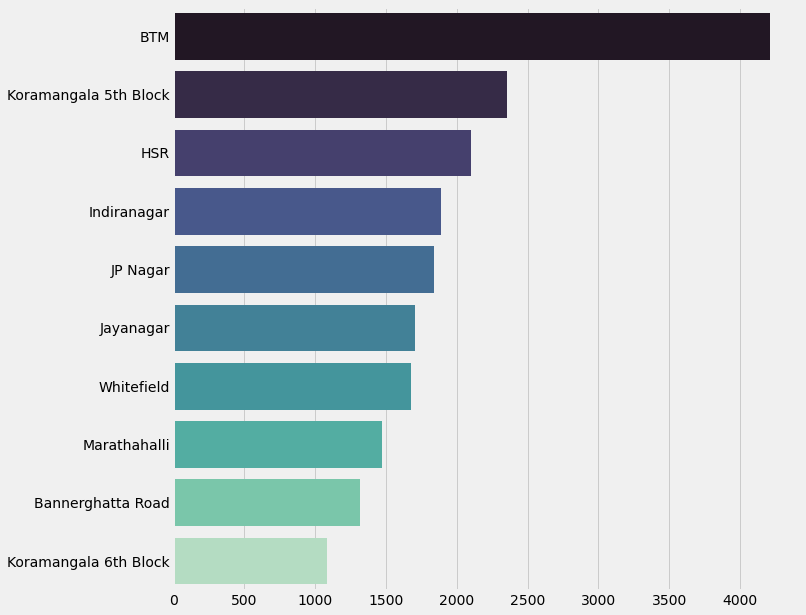

In [144]:
plt.figure(figsize=(10,10))
restaurant_counts = df['location'].value_counts()[:10].values
indices_area = df['location'].value_counts()[:10].index
sb.barplot(restaurant_counts,indices_area,palette='mako')
plt.show()

- From the above plot it can be seen that, BTM layout, Kormangla 5th Block and HSR Layout have many restaurants which mean that these are the three food loving areas!

## Moving onto inspecting details about restaurants

- Firstly, we'll see the distribution of different types of restaurants across Bengaluru

- Then, we'll inspect the proportion of restaurants accepting online orders and what difference does it make to have online business setup

- Next, we'll see which restaurants provide table bookings

- Then we'll find the distribution of the cost for two across all the restaurants

- At last we will find the distribution of ratings 


**Distribution of different types of restaurants**

In [145]:
rest_count = df['rest_type'].value_counts().values[:10]

In [146]:
rest_count

array([15011,  9878,  3491,  1925,  1777,  1458,  1123,   775,   702,
         650])

In [147]:
rest_type = df['rest_type'].value_counts().index[:10]

In [148]:
rest_type

Index(['Quick Bites', 'Casual Dining', 'Cafe', 'Dessert Parlor', 'Delivery',
       'Takeaway, Delivery', 'Casual Dining, Bar', 'Bakery', 'Beverage Shop',
       'Bar'],
      dtype='object')

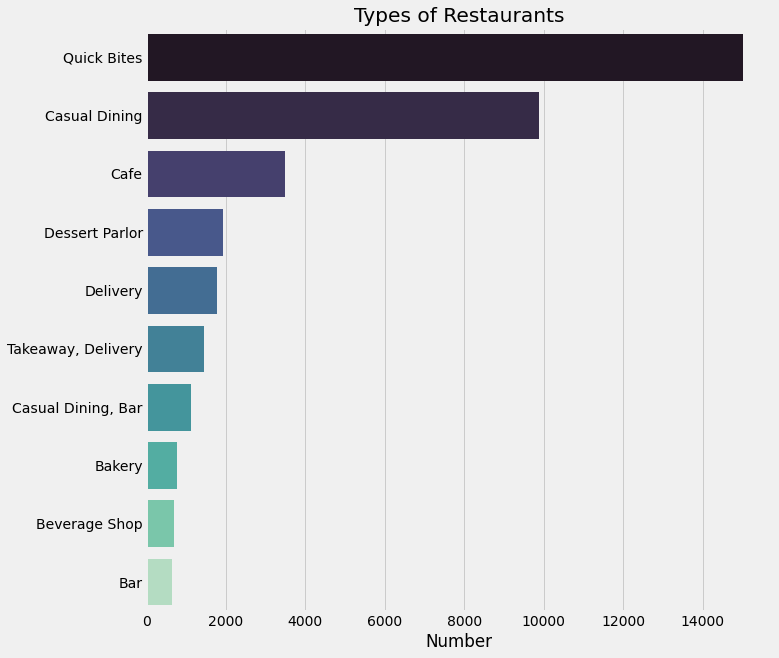

In [149]:
plt.figure(figsize = (10,10))
sb.barplot(rest_count,rest_type,palette='mako')
plt.title('Types of Restaurants')
plt.xlabel('Number')
plt.show()

It can be very clearly observed that those restaurants which offer a quick bite have the highest number. 

 - This perfectly aligns with the natural trend of people prefering these restuarants as they are quick to serve food at affordable prices, which makes it all the more attractive to the working public!

**To go or not to go online, that is the question!**

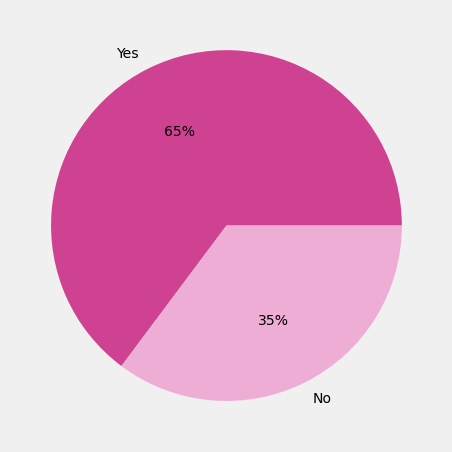

In [150]:
plt.figure(figsize = (7,17))
data = df['online_order'].value_counts().values
labels = df['online_order'].value_counts().index
colors = sb.color_palette('PiYG')
plt.pie(data,labels=labels, colors=colors,autopct='%0.0f%%')
plt.show()

- As it can be seen from the above Pie chart, around 65% of the restaurants accept online orders.

- The rest 35% don't accept online orders and the reasons may be many.
 - They might be high-end restaurants who only have dine in service
 - These restaurants might be small or newly opened
 - Since restaurants offering food by online delivery via zomato have to pay a commission to Zomato, this might have made some restaurants back away due to high commission rates.

**Looking at the number of votes recieved by restaurants accepting online orders vs those which donot accept online orders**

In [151]:
online_votes = df[df['online_order']=="Yes"]['votes'].value_counts().sum()
online_votes

28202

In [152]:
offline_votes=df[df['online_order']=="No"]['votes'].value_counts().sum()
offline_votes

15331

- It is quite logical to see that the number of votes recieved by restaurants who are open for online orders is nearly 2 times the votes recieved by those restaurants which don't accept any online orders!

- This clearly means that restaurants accepting online orders have a much much larger reach through Bangalore and hence they are able to harness so many votes. 

- Therefore it is clear that if a restaurant sets up online ordering option, it can cater to a larger audience and thus improving its marketing and sales.

**Table bookings in restaurants**

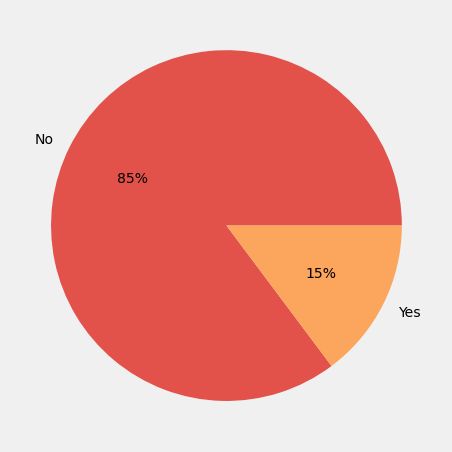

In [153]:
plt.figure(figsize = (7,17))
data = df['book_table'].value_counts().values
labels = df['book_table'].value_counts().index
colors = sb.color_palette('Spectral')
plt.pie(data,labels=labels, colors=colors,autopct='%0.0f%%')
plt.show()

- From the above pie chart, it's pretty obvious that the majority of the restaurants listed in the Zomato website donot offer Table bookings
- Only around 15% provide the facility of reservations

**Finding the distribution of table reservation across restaurants**

In [154]:
table_reserve = df[df['book_table'] == 'Yes']['name'].value_counts()[:35]
table_reserve

Onesta                                        85
Mainland China                                45
Oye Amritsar                                  41
Toscano                                       40
Hammered                                      40
Barbeque Nation                               39
Sherlock's Pub                                35
Banjara Melting Pot                           33
Gilly's Restobar                              32
Nandhana Palace                               30
Pasta Street                                  28
Smally's Resto Cafe                           26
Rajdhani Thali Restaurant                     26
Infinitea Tea Room & Tea Store                25
Cafe Azzure                                   25
Fabcafe                                       25
Harry's Bar + Cafe                            23
The Biere Club                                23
The Grill House                               23
Chutney Chang                                 23
Tiger Trail - Ramada

In [155]:
table_indices = table_reserve.index
table_indices

Index(['Onesta', 'Mainland China', 'Oye Amritsar', 'Toscano', 'Hammered',
       'Barbeque Nation', 'Sherlock's Pub', 'Banjara Melting Pot',
       'Gilly's Restobar', 'Nandhana Palace', 'Pasta Street',
       'Smally's Resto Cafe', 'Rajdhani Thali Restaurant',
       'Infinitea Tea Room & Tea Store', 'Cafe Azzure', 'Fabcafe',
       'Harry's Bar + Cafe', 'The Biere Club', 'The Grill House',
       'Chutney Chang', 'Tiger Trail - Ramada Hotel', 'Little Italy',
       'Skylit - Citrus Hotels', 'Mudpipe Cafe', 'Watson's', 'Punjab Bistro',
       'Green Theory', 'Roundup Cafe', 'The Lobby Brew - Conrad Bengaluru',
       'Cilantro', 'Bonsouth', 'Tangerine - Davanam Sarovar Portico Suites',
       'Bistro Claytopia', 'House Of Commons', 'Laughing Llama Gastropub'],
      dtype='object')

In [156]:
table_counts = table_reserve.values
table_counts

array([85, 45, 41, 40, 40, 39, 35, 33, 32, 30, 28, 26, 26, 25, 25, 25, 23,
       23, 23, 23, 23, 23, 23, 22, 22, 21, 21, 21, 21, 21, 21, 21, 21, 21,
       20])

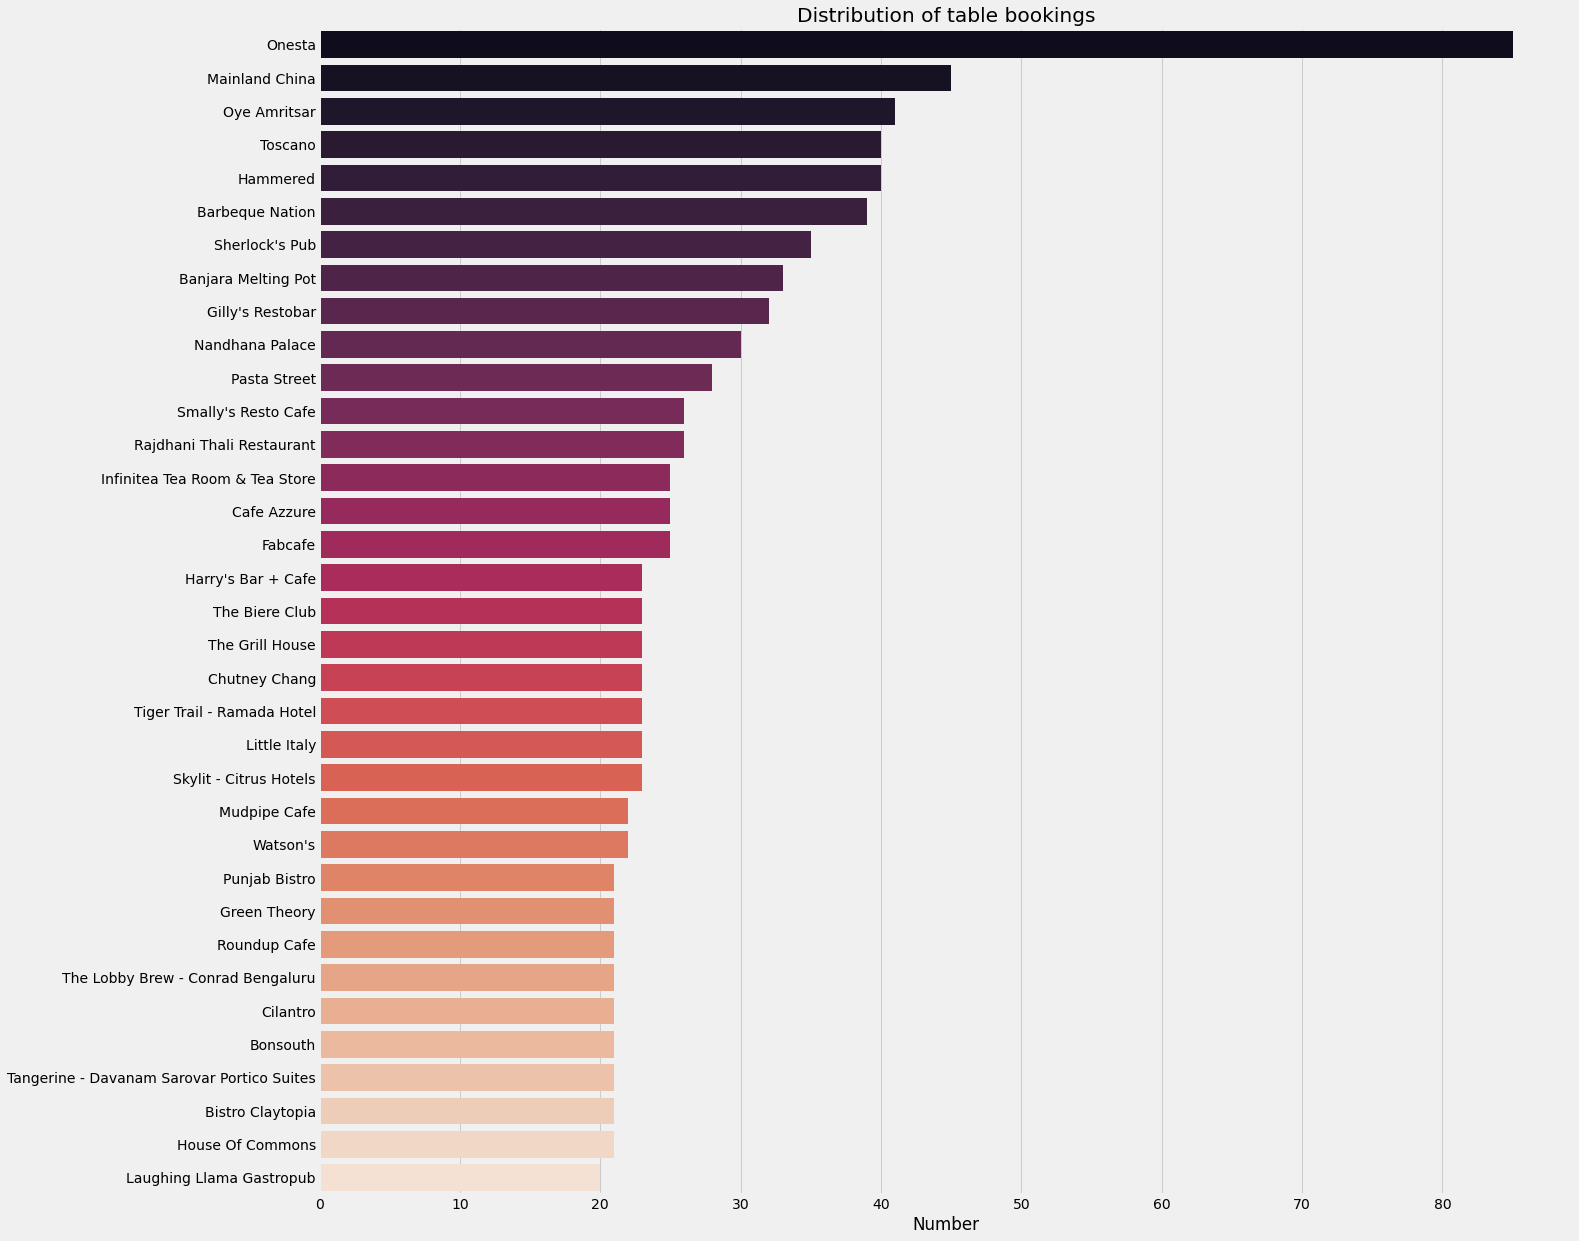

In [157]:
plt.figure(figsize = (20,20))
sb.barplot(table_counts,table_indices,palette='rocket')
plt.title('Distribution of table bookings')
plt.xlabel('Number')
plt.show()

- Of the top 10 restaurant chains in Bengaluru, only Onesta made it in the list of restaurants which had table reservations
- Onesta is topping the list having 80+ table bookings

**Distribution of the cost for two across all the restaurants**

In [158]:
cost_dist = df['approx_cost(for two people)']

In [159]:
cost_dist=cost_dist.apply(lambda x: int(x.replace(',','')))

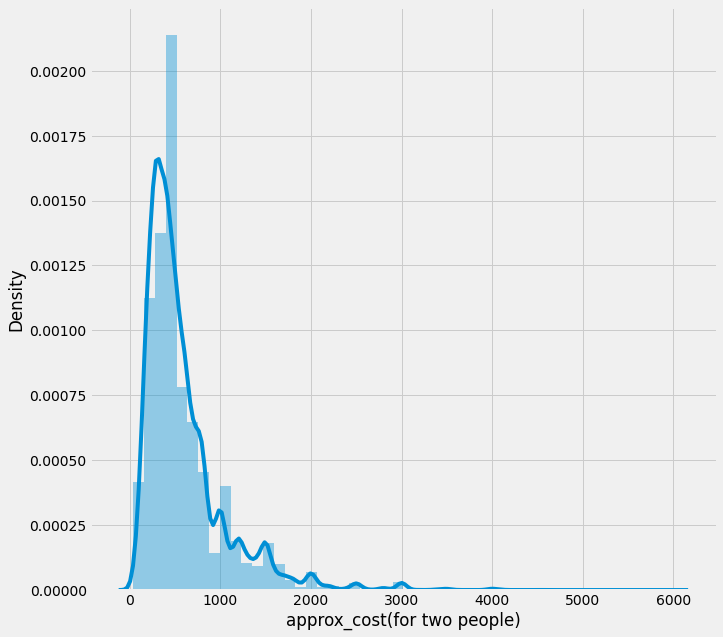

In [160]:
plt.figure(figsize=(10,10))
sb.distplot(cost_dist)
plt.show()

In [161]:
budget_friendly_percent = len(cost_dist[cost_dist.values<=500])/len(cost_dist)
budget_friendly_percent

0.6022327889187513

**It can be seen that, In the more than 60% of the restaurants listed in Zomato the cost for two people is less than 500 rupees!**

In [162]:
cost_dist.skew()

2.4516826876662896

The distribution is Skewed
 - As it can be seen from the above figure and also from the skewness value 
 - The distribution of the cost for two is a Right Skewed or Positive Skewed distribution.


**Rating distribution of the restaurants**

In [163]:
ratings_ = df['rating out of 5']
ratings_ = ratings_.apply(lambda x: float(x.split('/')[0]) if (len(x)>3) else np.nan).dropna()

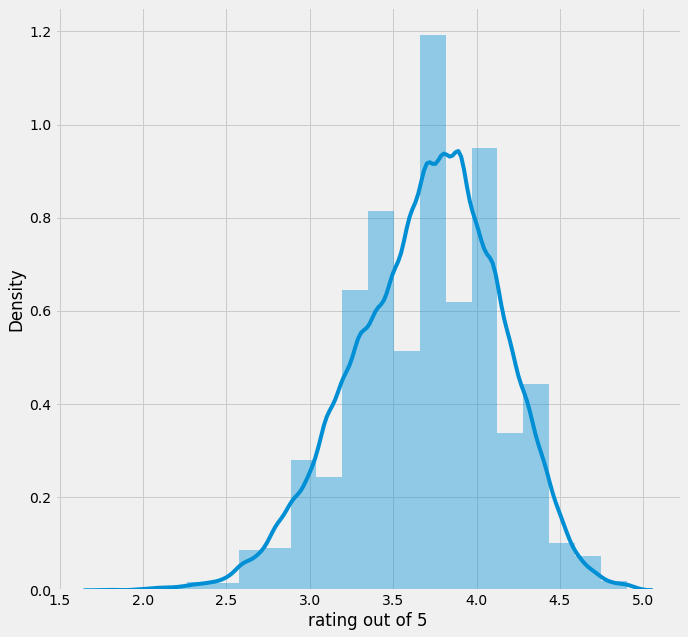

In [164]:
plt.figure(figsize= (10,10))
sb.distplot(ratings_,bins = 20)
plt.show()

- In the above distribution it can be seen that the proportion of restaurants having ratings < 3 and more than 4.5 are very rare.

- From the above distribution, we can say that a big chunk of the restaurants listed in Zomato Bangalore have ratings in between 3 to 4.


## Concluding comments: 
- Cafe Coffee Day, Onesta and Empire Restaurant are the top 3 restaurants in terms of the number of brances across Bangalore.

- BTM Layout, Kormangla 5th Block and HSR layout have the most number of restaurants in them, hence these are the top 3 Foodie locations not to miss in Bangalore.

- Those restaurants that are themed on Quick Bites are wide spread all across Bengaluru, indicating that the public demand for quick food.

- More than 65% of the restaurants listed in the Zomato Bangalore website, have the facility of online order and delivery.

- Not so surprisingly, these restaurants have a wider reach of audience to cater for and hence they are more popular as compared to the counterparts which have no option of online orders.

- Almost 85% of the restaurants do not have the facility of reservation of tables, indicating the non popularity of booking a table across Bangalorians.

- Out of those 15% which have the reservation facility, Onesta, Mainland China and Oye Amritsar have the majority of bookings.

- In more than 60% of the restaurants, the food cost for two people is less than 500 rupees.

- Finally, it is seen that around 80 to 90% of the restaurants listed on zomato have ratings ranging from 3 to 4 out of 5.